In [1]:
import pygrib, time, os, sys, scipy
import numpy as np
import cartopy as ct
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from datetime import datetime, timedelta

In [2]:
# domain with 0.25 deg spacing
lats = np.flip(np.arange(20, 50.25, 0.25))
lons = np.arange(-90, -39.75, 0.25)

In [3]:
# converts gridpts to lat/lon coordinates
def lat_lon(gridx, gridy, lons, lats):
    lon = lons[gridx]
    lat = lats[gridy]
    return lon, lat

In [4]:
# major nor'easters, IDs from tracking algorithm
id1 = '10291991-00-131-33'
id2 = '03131993-18-54-52'
id3 = '02042010-18-0-116'
id4 = '01032018-12-49-93'

In [5]:
# hourly low-pressure center coordinates of 4 major nor'easters
# taken from .csv output from tracking algorithm
xcs1 = [131, 143, 137, 131, 117, 112, 107, 95, 85, 78, 74, 74, 78, 85, 92, 95, 97, 101, 104]
ycs1 = [33, 27, 36, 50, 47, 48, 42, 42, 42, 44, 48, 53, 57, 58, 53, 47, 42, 34, 25]

xcs2 = [54, 57, 63, 79, 101, 115]
ycs2 = [52, 44, 38, 26, 6, 0]

xcs3 = [0, 3, 6, 11, 20, 43, 56, 63, 64, 72, 91, 110, 137, 153, 173, 172, 176, 180]
ycs3 = [116, 82, 77, 73, 71, 62, 56, 53, 51, 53, 51, 47, 32, 28, 11, 6, 2, 0]

xcs4 = [49, 53, 57, 68, 71, 81, 90, 96, 101, 104, 105]
ycs4 = [93, 87, 76, 61, 54, 43, 31, 19, 9, 3, 0]

In [6]:
# max wind speeds at 1-hr timesteps
w1 = [22.82002032, 21.06245289, 21.17016735, 21.69703427, 21.78089861, 21.76963241, 23.15828619, 22.71614954, 22.13794874, 22.27632044, 22.11544842, 22.94631502, 23.6020012, 23.74056642, 23.17407458, 22.77065758, 22.92810867, 23.06004048, 23.50501412, 23.93550547, 24.82435182, 25.44006963, 25.64234193, 27.38891998, 26.56950013, 27.3878981,  27.30006876, 26.74150663, 26.79513895, 26.77651063, 26.45462883, 26.59818446, 26.92250762, 26.97436053, 28.42883396, 28.38945958, 28.21197018, 28.78605942, 27.83589819, 27.55850105, 27.83819403, 28.06893343, 27.59668173, 28.14702209, 28.20734964, 26.67445251, 27.52057014, 27.52176662, 27.70005129, 27.5375592, 25.74067647, 24.69532007, 23.79824495, 23.05446599, 22.43689938, 21.94826119, 22.15715105, 21.41836787, 20.5617026, 20.21380708, 20.07190783, 20.01716972, 19.4306844,  18.94852473, 18.82536993, 18.54312389, 17.96765431, 17.94287284, 18.05015541, 17.91236905, 18.16322495, 17.73839337, 17.77152376, 17.42404482, 16.77376811, 16.51820725, 16.24638899, 16.33498546, 16.03015067, 15.94950352, 15.77154399, 15.71824658, 16.4412342, 16.43401987, 16.31936801, 16.33455796, 16.63934784, 16.52437592, 15.93862867, 16.35969168, 16.63788901, 16.8885731, 16.88252979, 16.80671818, 17.2505056, 17.14277929, 17.20644894, 16.99970415, 17.74379941, 17.7167409, 17.33558789, 17.56341472, 16.55938114, 16.74589216, 16.16347796, 14.83959077, 15.24080434, 14.74564672, 14.31968084]

w2 = [28.60292173, 30.53987656, 31.66542314, 29.8273385, 27.47617374, 27.48756523, 26.6475644, 26.23218764, 26.06287828, 27.02842032, 26.99816292, 27.46579416, 27.10745288, 25.9754291, 26.31412866, 27.26620832, 24.43579453, 24.63980227, 25.36053042, 25.43462357, 24.20446383, 24.05498093, 24.28292309, 22.9183585, 21.74186266, 21.76485065, 22.97330701, 21.85746253, 19.95637829, 20.56418681, 20.1878306]

w3 = [11.32384783, 11.56474122, 11.7866303, 12.43443456, 12.44678439, 13.23767559, 14.01207896, 14.81365094, 15.05251553, 15.12250959, 14.64159178, 14.40431317, 14.43092075, 14.60057323, 14.84456057, 15.03666611, 13.28444615, 13.45451448, 13.56143621, 14.50558948, 15.03227016, 14.57101934, 14.80855321, 15.36301673, 15.03615759, 16.48515479, 16.31507471, 16.32890139, 16.86712517, 17.28641064, 17.89513248, 18.42057778, 19.66928663, 20.12228481, 20.67264951, 21.37932676, 21.64207874, 20.96437362, 22.08484752, 22.73212511, 21.58013032, 20.72920935, 21.26077816, 20.88051134, 19.88126871, 19.77242915, 20.39648407, 21.33780756, 22.09207055, 21.97909084, 21.70756621, 23.04957917, 24.01848707, 25.27247962, 26.80727727, 26.7440657, 26.16538508, 25.91479328, 25.5555299, 25.45610007, 24.67901885, 24.15292756, 23.98683814, 23.68841871, 23.36348721, 23.28946528, 22.71600658, 22.46689151, 22.38630967, 22.35076409, 22.26205345, 22.02123984, 21.48135854, 20.85740896, 21.06018421, 20.31575672, 19.97276799, 19.72069247, 20.36647856, 20.79458305, 20.36707672, 20.16322336, 19.64142436, 19.99007478, 20.68912796, 20.8914213, 20.37670478, 19.68135462, 19.4068367, 20.14324003, 20.26155984, 20.20373163, 19.89880491, 19.31130239, 19.45421173, 19.65336948, 19.8451402, 19.29388428, 18.77198435, 18.58293858, 18.96324914, 19.34009797, 19.52695573]

w4 = [17.84649315, 19.20795271, 18.56068693, 18.24625733, 18.61912749, 19.84440333, 21.37848147, 23.8436969, 23.11967155, 22.85807728, 24.83518207, 23.91219045, 24.30743764, 24.81096722, 26.1289328, 27.09228414, 27.17194165, 27.6952419, 29.45966678, 29.36222959, 30.72099708, 30.76313883, 30.50739914, 30.95227791, 30.57767552, 31.2122034, 31.92760508, 31.48517079, 29.17845506, 30.31768739, 30.21031835, 29.08491069, 28.01750498, 28.09882903, 26.71761079, 26.88000756, 27.36622342, 27.07574315, 26.32240272, 25.51957517, 25.36794343, 25.01653037, 23.93487498, 23.01326739, 23.17495444, 23.47888196, 24.41221281, 24.69673129, 22.80964033, 22.02888011, 20.97413778, 21.4174684, 21.04340389, 20.23727989, 19.98307867, 19.92496401, 20.14753107, 20.35704911, 20.1842213, 19.31447841, 18.69546536]

In [7]:
# max wind speeds at 6-hr timesteps
w1_6 = w1[::6]
w2_6 = w2[::6]
w3_6 = w3[::6]
w4_6 = w4[::6]

In [8]:
df1 = pd.DataFrame({'lons': lat_lon(xcs1, ycs1, lons, lats)[0],
                   'lats': lat_lon(xcs1, ycs1, lons, lats)[1],
                   'w': w1_6})
df2 = pd.DataFrame({'lons': lat_lon(xcs2, ycs2, lons, lats)[0],
                   'lats': lat_lon(xcs2, ycs2, lons, lats)[1],
                   'w': w2_6})
df3 = pd.DataFrame({'lons': lat_lon(xcs3, ycs3, lons, lats)[0],
                   'lats': lat_lon(xcs3, ycs3, lons, lats)[1],
                   'w': w3_6})
df4 = pd.DataFrame({'lons': lat_lon(xcs4, ycs4, lons, lats)[0],
                   'lats': lat_lon(xcs4, ycs4, lons, lats)[1],
                   'w': w4_6})

In [9]:
# helper function for plotting directional arrows on lines that connect data points
def plot_arrows(ax, lonsc, latsc):
    xas = (lonsc[1:] + lonsc[:-1])/2
    yas = (latsc[1:] + latsc[:-1])/2
    x1 = lonsc[1:]
    y1 = latsc[1:]
    for i in range(len(xas)):
        ax.arrow(xas[i], yas[i], (x1[i]-xas[i])/1000, (y1[i]-yas[i])/1000, shape='full', color='k', head_width=0.4, head_length=0.6, zorder=8)
    return ax

In [10]:
# general function for plotting a storm's trajectory
def plot_function(df, lons, lats, title, clevels):
    plt.figure(figsize=(6, 6))
    ax = plt.axes(projection=ct.crs.PlateCarree())
    ax.set_extent([-90, -40, 20, 50], crs=ct.crs.PlateCarree())
    ax.coastlines(linewidth=0.6, zorder=0, color='dimgray')
    ax.add_feature(ct.feature.STATES, linewidth=0.6, zorder=1, edgecolor='dimgray')
    gls = ax.gridlines(draw_labels=True, zorder=2)
    gls.top_labels=False
    gls.right_labels=False
    ax.set_title(title, size=11)

    # plot centers
    ax.plot(df['lons'], df['lats'], linewidth=1, color='k', zorder=9)
    ax = plot_arrows(ax, df['lons'].to_numpy(), df['lats'].to_numpy())
    norm = mpl.colors.BoundaryNorm(clevels, mpl.cm.jet.N)
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet), ax=ax, orientation='vertical', fraction=0.031, pad=0.04, label='Max. wind speed (m/s)')
    ax.scatter(df['lons'], df['lats'], s=45, facecolors='b', edgecolors='white', zorder=10, c=df['w'], cmap='jet', norm=norm)
    return ax

In [11]:
# contour levels for wind speeds
wlevels = np.arange(15, 45, 5)
wlevels

array([15, 20, 25, 30, 35, 40])

In [12]:
# setting up a for loop for plotting 4 nor'easters on 1 figure
dfs = [df1, df2, df3, df4]
titles = ['Oct.-Nov. 1991, "Perfect Storm"', 'Mar. 1993, "Storm of the Century"', 'Feb. 2010, "Snowmageddon"', 'Jan. 2018 Blizzard']
panel_labels = ["A", "B", "C", "D"]

# start time; location and labels
tlons1 = [-59, -80, -88, -82]
tlats1 = [45, 34, 22, 24]
tstart = ['10-29, 00:00', '03-13, 18:00', '02-04, 18:00', '01-03, 12:00']

# end time; location and labels
tlons2 = [-75, -60, -58, -62]
tlats2 = [45, 47, 48, 48]
tend = ['11-02, 12:00', '03-15, 00:00', '02-09, 00:00', '01-06, 00:00']

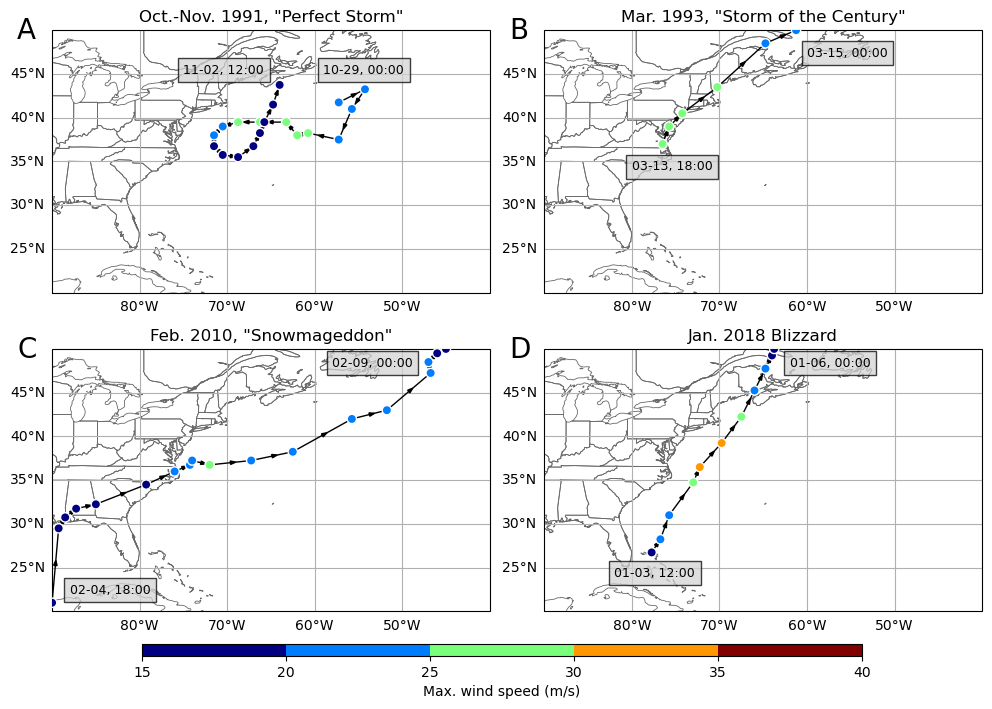

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9.5), subplot_kw={'projection': ct.crs.PlateCarree()})
axs=axs.flatten()
norm = mpl.colors.BoundaryNorm(wlevels, mpl.cm.jet.N)

for i in range(4):
    axs[i].set_extent([-90, -40, 20, 50], crs=ct.crs.PlateCarree())
    axs[i].coastlines(linewidth=0.6, zorder=0, color='dimgray')
    axs[i].add_feature(ct.feature.STATES, linewidth=0.6, zorder=1, edgecolor='dimgray')
    gls = axs[i].gridlines(draw_labels=True, zorder=2)
    gls.top_labels=False
    gls.right_labels=False
    axs[i].set_title(titles[i], size=12)
    axs[i].plot(dfs[i]['lons'], dfs[i]['lats'], linewidth=1, color='k', zorder=9)
    xas = (dfs[i]['lons'].to_numpy()[1:] + dfs[i]['lons'].to_numpy()[:-1])/2
    yas = (dfs[i]['lats'].to_numpy()[1:] + dfs[i]['lats'].to_numpy()[:-1])/2
    x1 = dfs[i]['lons'].to_numpy()[1:]
    y1 = dfs[i]['lats'].to_numpy()[1:]
    for j in range(len(xas)):
        axs[i].arrow(xas[j], yas[j], (x1[j]-xas[j])/1000, (y1[j]-yas[j])/1000, shape='full', color='k', head_width=0.4, head_length=0.6, zorder=8)
    axs[i].scatter(dfs[i]['lons'], dfs[i]['lats'], s=45, facecolors='b', edgecolors='white', zorder=10, c=dfs[i]['w'], cmap='jet', norm=norm)
    axs[i].text(tlons1[i], tlats1[i], tstart[i], fontsize=9, bbox=dict(facecolor='lightgray', alpha=0.75))
    axs[i].text(tlons2[i], tlats2[i], tend[i], fontsize=9, bbox=dict(facecolor='lightgray', alpha=0.75))
    axs[i].text(-0.08, 1.05, panel_labels[i], fontsize=20, verticalalignment='top', horizontalalignment='left', transform=axs[i].transAxes)

fig.subplots_adjust(bottom=0.225, wspace=0.125, hspace=0.05)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.0125])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet), cax=cbar_ax, orientation='horizontal', label='Max. wind speed (m/s)')

# # Save plot
# plt.savefig('Fig3_major_noreasters.pdf', format='pdf', dpi=1000, bbox_inches='tight') 